# Association, Correlation, and Causation

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

![](https://imgs.xkcd.com/comics/correlation.png)

"*Correlation does not necessarily imply causation*." You've surely heard this statement many times by now. In this section, we'll understand the relationship between association, correlation, and causation. We'll look at a few different problems that arise when thinking about these concepts. 

We'll start by looking at three mistakes that one can make when thinking about association, correlation, and causation. Then, we'll review a few different ways of measuring association, which we'll use in our later discussion of causality.



## Prediction vs Causation

In many applications, we may be interested in predicting a certain quantity from another quantity. We've already seen examples of this: GLMs help us predict one variable given many others. But it's important to keep in mind the distinction between prediction and causation. Here's an example that highlights the difference.

Suppose we're interested in using recorded audio data from a soccer match TV broadcast to predict how many people were applauding at any given time. Intuitively, this seems like a case where we can make a pretty good prediction: louder audio should be predictive of more people applauding. However, even though our prediction ability may be excellent, this does not imply a causal relationship at all: in fact, the data we observe (audio volume) is caused by the thing that we're trying to predict (people applauding). 

In many cases, our goal may be predictive power, in which case the reverse causality here is fine. However, in cases where we're trying to infer causality, high predictive power alone is not enough.

## Mistaking correlation (and association) for causation

It's often easier to fall for the trap of conflating association and causation than you might think. For example, consider the following story:

> A Martian arrives on Earth, and after a year of study announces the discovery of a correlation between using an umbrella and getting wet: people who use umbrellas have a higher probability of getting wet (even if it's just their pants) than people who don't use an umbrella. The Martian infers that using an umbrella causes people to get wet.

The correlation that the Martian observes is real, but the real causal story is a little more complex than this: we use umbrellas when it rains, and we get wet when it rains. While it's easy to point to this example and laugh at how silly the Martian is, the reality is that we hear (and make) inferences like this all the time.

### Confounding variables

A key problem that comes up when reasoning about causality is the existence of **confounding** variables. 


#### Sunburns and ice cream sales

As an example, let's suppose we collect daily data on sunburns and ice cream sales for an entire year. We find a strong positive association in the data: days with higher ice cream sales have much higher sunburn rates. Clearly, sunburn doesn't cause increased ice cream sales, and increased ice cream sales don't cause sunburns, either. This example fails to take into account the confounding effect of the weather: hot, sunny weather causes people to buy more ice cream, and also causes more sunburns. We can illustrate this using a directed graph, similar to the ones we used in Bayesian graphical models:

![](figures/sunburn_icecream.png)

Here, the edges indicate *causal* relationships (we'll formalize this idea in the next section). For example, this graph claims that sun causes a change in sunburn rates. Like the example with the Martian, the existence of a confounding variable (sunny weather) is clear in this example. 

#### Cameras and social media likes

Let's look at an example with a more complex relationship. Suppose we want to know whether using a high-end DSLR camera causes increased likes on Instagram posts. If we collect data and find a strong positive association between DSLR cost and number of likes, does this let us conclude a causal relationship? In this case, the answer is a more nebulous "maybe". There are other confounding factors here: for example, high-profile, well-financed accounts that already have a lot of followers are more likely to use high-end cameras than amateur accounts. In this case, the causal graph might look more like this:

![](figures/instagram.png)

Without further information about the account's size and budget, it's hard to determine a causal relationship. 


### Spurious correlations

Sometimes, regardless of whether or not we're trying to draw conclusions about causality, the correlations we observe might be *spurious*: that is, they could occur just by chance, or by a series of confounds that may negate any conclusions we would want to draw. One example from [Tyler Vigen's Spurious Correlations website](https://www.tylervigen.com/spurious-correlations) is shown below:



![](figures/mozzarella_civile_phd.png)

We can draw a directed graph for these two variables: in this case, there are no edges between them because there's no causal relationship either way, and no confounding variable:


![](figures/spurious.png)

### The Marshmallow Experiment
Another example is the famous so-called "[marshmallow study](https://en.wikipedia.org/wiki/Stanford_marshmallow_experiment)". In this study, researchers presented children with a choice: either they could have one marshmallow immediately, or, if they waited 15 minutes, they could have two marshmallows. They followed the students for 30 years, and found that students who waited for the extra payout achieved greater success in life (as measured by the researchers). Although the original researchers cautioned people to avoid direct causal interpretations, the most common and widespread interpretation was causal: that children's ability to delay gratification (i.e., to wait 15 minutes for a double marshmallow payout) caused them to succeed throughout their lives. Schools implemented coaching programs to help students build self-control and resist the urge to eat the first marshmallow.

However, followup studies have shown a much more [complex and nuanced story](https://anderson-review.ucla.edu/new-study-disavows-marshmallow-tests-predictive-powers/): while many follow-up studies have shown an association, the predictive effect of resisting a marshmallow seems to diminish or disappear when controlling for factors such as socioeconomic background or other measures of self-control. Many scientists have argued that **rather than self-control, what the study really measures is behavior in response to middle-class or upper-class upbringings**: in other words, responding to environments without shortages.

Stories like this one illustrate both the importance and the difficulty of determining causality from observational studies. If we could somehow determine that teaching small children self-control is guaranteed to have a large impact on their eventual life outcomes, then this seems like a worthwhile policy goal. This is even more true if the effect is true regardless of socioeconomic background. However, the numerous confounding variables and unclear direction of causality highlight the need for methods that can determine causality in such environments, outside of a randomized controlled trial.

## Simpson's Paradox

One counterintuitive problem that can come up with confounding variables is **Simpson's Paradox**. Let's start with a hypothetical example: suppose a group of restaurant critics spends two years sampling dishes from two popular restaurants, A and B. They rate every dish that they order with either a 👎 (didn't like) or a 👍 (liked). They summarize the data in the following table:

In [2]:
food = pd.read_csv('data/restaurants.csv')
food.pivot_table(
    values='count', index='Restaurant', columns='Dish rating', aggfunc=sum
)

/var/folders/xb/x1ncwczj3ld6c06v8p22z_7m0000gn/T/ipykernel_13554/711508461.py:2: FutureWarning: The provided callable <function sum at 0x10494ce00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  food.pivot_table(


Dish rating,👍,👎
Restaurant,,
A,120,80
B,80,20


Just looking at this data, it seems like they like restaurant B's food much better (80% success rate compared to 60% for restaurant A).

But now, let's suppose we learn that they collected their data from 2019-2020, and that the critics were much harsher in 2020 than in 2019, perhaps due to pandemic-induced gloom. Furthermore, we learn that Restaurant A specializes in take-out and delivery, which was the safest and most common way to order food in 2020. 

Motivated by this additional context, let's break down the data by year:

In [3]:
food.pivot_table(
    values='count', index='Restaurant', 
    columns=['Year', 'Dish rating'], aggfunc=np.sum
)

/var/folders/xb/x1ncwczj3ld6c06v8p22z_7m0000gn/T/ipykernel_13554/4218979607.py:1: FutureWarning: The provided callable <function sum at 0x10494ce00> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  food.pivot_table(


Year        2019     2020    
Dish rating    👍   👎    👍   👎
Restaurant                   
A             20   0  100  80
B             70  10   10  10

Looking at this data, Restaurant A now looks better in both years! This is known as **Simpson's Paradox**: Restaurant B looks better in the aggregate data, but Restaurant A looks better when we look at each year separately. How can we resolve this conundrum?

Let's take a moment to look at the numbers: 
* In 2019 (first two columns), Restaurant A had a 100% (20/20) success rate with the critics, while Restaurant B had a 87.5% (70/80) success rate. 
* In 2020 (last two columns), Restaurant A had a 55.6% (100/180) success rate, while restaurant B had a 50% (10/20) success rate.

Why does this happen? It's because of the confounding effect of the year (i.e., the pandemic). Both restaurant's ratings were hurt a lot by the critics' harsh pandemic scores, but since Restaurant A saw a lot more orders in 2020, its overall numbers were hurt more. 

Before continuing, let's frame this question in the language of causal inference, so that we can use the intuition we've built up around confounding variables. Our question can be slightly rewritten as: does the critics' choice of restaurant (A vs B) affect whether they like the food (and therefore give it a 👍 rating)? In this setting, our treatment is the choice of restaurant: A or B. Our outcome is whether or not they liked a dish (i.e., whether they gave it a 👍 rating). The confounder is when they ordered the dish. Why is this a confounder? Because it has a causal effect on both treatment and outcome. Ordering dishes in 2020 caused the critics to choose a takeout-friendly option more often (B). Ordering dishes in 2020 also caused the critics to give positive reviews (👍) less often.


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('4HI30EwghPk')


We can also represent this information in a directed graph, as we did earlier:

![](figures/restaurant.png)


Note that we've used "year" as a confounder here, but that's a little imprecise: it isn't really the year that causes the change in the other two variables, but rather the pandemic.

The pandemic (as measured in this case by the year) affected the data in two ways:
1. In 2020, the critics rated a lot more dishes from restaurant A.
2. In 2020, the critics were much harsher.

When looking at the data separated by year, we can see that they preferred restaurant A in both years. But, because of the two factors above, when aggregating the data, restaurant A looks worse.

Note that despite the name, this isn't really a paradox: this happens entirely because of the confounding factor.

### (Optional) Visualizing Simpson's Paradox with Baker-Kramer Plots

We can visualize the percentages in the bullet points above on a graph. Let the $x$-axis represent the percent of dishes ordered in 2020, during the pandemic (confounding variable). Let the $y$-axis represent the proportion of dishes liked (outcome). We'll draw one line for each restaurant: the different lines show us the effect of the treatment.

For the data broken down by year, each table shows us data where the proportion ordered in 2020 is always 0 (for the 2019 data) or 1 (for the 2020 data). This corresponds to the four marked points (two blue circles and two orange squares):

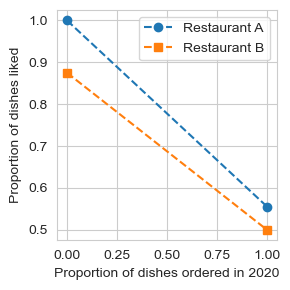

In [4]:
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot([0, 1], [20/20, 100/180], marker='o', ls='--', label="Restaurant A")
ax.plot([0, 1], [70/80, 10/20], marker='s', ls='--', label="Restaurant B")

ax.legend()
ax.set_xlabel("Proportion of dishes ordered in 2020")
ax.set_ylabel("Proportion of dishes liked")

plt.tight_layout()

This plot shows that the critics prefer Restaurant A (blue line) over Restaurant B (orange line). But when we looked at the aggregate data in the first table above, we were comparing restaurant A's dishes, which were mostly from 2020, to restaurant B's dishes, which were mostly from 2019. This is shown with the large circle/square:

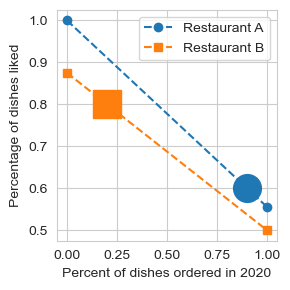

In [5]:
f, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot([0, 1], [20/20, 100/180], marker='o', ls='--', label="Restaurant A")
ax.plot([0, 1], [70/80, 10/20], marker='s', ls='--', label="Restaurant B")

ax.legend()

ax.scatter(.9, .6, marker='o', s=400, color='tab:blue')
ax.scatter(.2, .8, marker='s', s=400, color='tab:orange')

ax.set_xlabel("Percent of dishes ordered in 2020")
ax.set_ylabel("Percentage of dishes liked")

plt.tight_layout()

This plot is called a Baker-Kramer (or B-K) plot: it highlights that even though Restaurant A is better than Restaurant B, the confounding effect of the year makes Restaurant A look much worse.


## Berkson's Paradox and Colliders

Suppose that a baker decides to put out some of his best loaves of bread on display in the front window, to help attract customers. For every batch of bread he bakes, he rates the bread in that batch on flavor and appearance (from 1-10). There isn't any correlation between flavor and appearance, so the scores look like this:


Text(0, 0.5, 'Appearance')

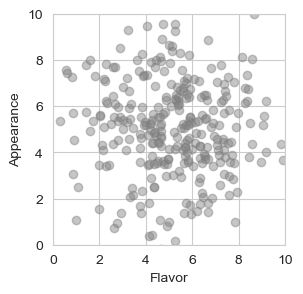

In [6]:
np.random.seed(2026)
flavor = np.random.normal(5, 2, 300)
appearance = np.random.normal(5, 2, 300)
f_gray, ax_gray = plt.subplots(1, 1, figsize=(3, 3))
ax_gray.scatter(flavor, appearance, color='gray', alpha=0.45)
ax_gray.axis([0, 10, 0, 10])
ax_gray.set_xlabel('Flavor')
ax_gray.set_ylabel('Appearance')

He then decides to add up the flavor and appearance scores: for any batch with a combined score greater than 10, he'll display a loaf from that batch in the front window.

Text(0, 0.5, 'Appearance')

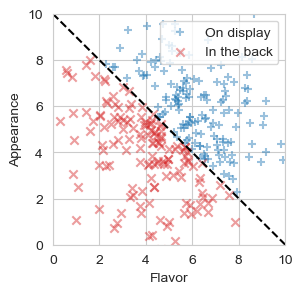

In [7]:

f_color, ax_color = plt.subplots(1, 1, figsize=(3, 3))
is_on_display = (flavor + appearance > 10)
ax_color.scatter(
    flavor[is_on_display], appearance[is_on_display], label='On display',
    color='tab:blue', marker='+', alpha=0.45
)
ax_color.scatter(
    flavor[~is_on_display], appearance[~is_on_display], label='In the back',
    color='tab:red', marker='x', alpha=0.45
)
ax_color.legend()
ax_color.plot([0, 10], [10, 0], 'k--')
ax_color.axis([0, 10, 0, 10])
ax_color.set_xlabel('Flavor')
ax_color.set_ylabel('Appearance');


At the end of the day, he gives the loaves from the display case (shown in blue above) to his friends to eat. His friends notice that there's a negative correlation between appearance and flavor: the loaves that look nicer tend to taste worse. When they bring this issue up with the baker, he shows them the first graph, and tells them that there isn't any correlation. 

Who's right? 

There are some similarities to the earlier example with Simpson's Paradox: we have two variables (flavor/appearance) whose relationship changes when a third variable (display) is introduced. But there's a very important difference here: the direction of causality. If we draw a causal graph for these variables, it would look like this:

![](figures/berkson.png)

Because the direction of causality is different, display isn't a confounder here: we instead call it a **collider**. 

If we include colliders such as this one in our analyses, we're likely to draw incorrect conclusions. Here, the association observed by the baker's friends does not reflect any causal relationship between flavor and appearance, but instead only is caused by how the baker chooses which loaves go into the display case.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('9qNIKKxQzIU')

## More Examples

* Berkeley graduate admissions: The [Patterns, Predictions, and Actions](https://mlstory.org/causal.html#the-limitations-of-observation) book has an excellent discussion of this well-known case of Simpson's Paradox.
* Simpson's Paradox also shows up in sports (e.g., [basketball](http://www.math.kent.edu/~darci/simpson/bballexamples.html) and [tennis](https://metro.co.uk/2014/01/17/roger-federer-is-rubbish-at-tennis-because-he-tries-too-hard-4264338/)), [physics](https://aip.scitation.org/doi/10.1063/1.4977784), [COVID-19 mortality rates](http://causality.cs.ucla.edu/blog/index.php/2020/07/06/race-covid-mortality-and-simpsons-paradox-by-dana-mackenzie/), and much more.
* Continuous data: *coming soon*